# EDA for Ratings

## Import libraries

In [21]:
import pandas as pd
import numpy as np

import os
import re

import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
folder_dir = './ml1m/content/dataset/'

In [3]:
user_file = os.path.join(folder_dir, 'users.dat')
rating_file = os.path.join(folder_dir, 'ratings.dat')
movie_file = os.path.join(folder_dir, 'movies_train.dat')
genre_file = os.path.join(folder_dir, 'genres.txt')

img_file = os.path.join(folder_dir, 'ml1m-images')

In [4]:
users = pd.read_csv(user_file, sep='::',
                        engine='python',
                        names=['userid', 'gender', 'age', 'occupation', 'zip']).set_index('userid')
ratings = pd.read_csv(rating_file, engine='python',
                          sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])
movies_train = pd.read_csv(movie_file, engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid')

movies_train['genre'] = movies_train.genre.str.split('|')

users['age'] = users['age'].astype('category')
users['gender'] = users['gender'].astype('category')
users['occupation'] = users['occupation'].astype('category')
ratings['movieid'] = ratings['movieid'].astype('category')
ratings['userid'] = ratings['userid'].astype('category')

In [5]:
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [6]:
# movies which dont have ratings
movies_train.loc[~movies_train.index.isin(ratings.movieid.unique())]

,title,genre
movieid,,
794,Midnight Dancers (Sibak) (1994),"[Comedy, Drama]"
1146,Curtis's Charm (1995),"[Comedy, Drama]"
2564,"Empty Mirror, The (1999)",[Drama]
1710,Man of Her Dreams (1996),[Drama]
738,"Garcu, Le (1995)",[Drama]
...,...,...
768,Someone Else's America (1995),[Drama]
3369,Any Number Can Win (MÃ©lodie en sous-sol ) (1963),[Crime]
1065,"Woman in Question, The (1950)",[Mystery]


## EDA

In [22]:
ratings_users = ratings.merge(users, on='userid', how='outer')
ratings_users

,userid,movieid,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106
1000205,6040,1094,5,956704887,M,25,6,11106
1000206,6040,562,5,956704746,M,25,6,11106
1000207,6040,1096,4,956715648,M,25,6,11106


In [23]:
ratings_users.isnull().sum()

userid        0
movieid       0
rating        0
timestamp     0
gender        0
age           0
occupation    0
zip           0
dtype: int64

In [7]:
def extract_year(title):
    title = title.strip()
    year = re.findall(r'\(\d{4}\)', title)  
    if year:
        year = year[0]
        title = title.replace(year, '')
        year = year.strip('()')
    else:
        year = np.nan
    
    return year

print(extract_year("Washington (1997)"))

1997


In [8]:
# Extract year from title and add as a new column

movies_train['year'] = movies_train.title.apply(extract_year)

In [9]:
movies_train

,title,genre,year
movieid,,,
1650,Washington Square (1997),[Drama],1997
185,"Net, The (1995)","[Sci-Fi, Thriller]",1995
1377,Batman Returns (1992),"[Action, Adventure, Comedy, Crime]",1992
3204,"Boys from Brazil, The (1978)",[Thriller],1978
1901,Dear Jesse (1997),[Documentary],1997
...,...,...,...
2539,Analyze This (1999),[Comedy],1999
3038,"Face in the Crowd, A (1957)",[Drama],1957
1832,Heaven's Burning (1997),"[Action, Drama]",1997


In [10]:
ratings

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [11]:
# Create a dataframe from ratings, users and movies

rating_df = pd.merge(pd.merge(ratings, users, on='userid'), movies_train, on='movieid')
rating_df

,userid,movieid,rating,timestamp,gender,age,occupation,zip,title,genre,year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),[Drama],1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),[Drama],1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),[Drama],1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),[Drama],1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),[Drama],1975
...,...,...,...,...,...,...,...,...,...,...,...
817419,5433,286,3,960240881,F,35,17,45014,Nemesis 2: Nebula (1995),"[Action, Sci-Fi, Thriller]",1995
817420,5556,2198,3,959445515,M,45,6,92103,Modulations (1998),[Documentary],1998
817421,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),[Documentary],1998
817422,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),[Drama],1998


In [12]:
rating_df.explode('genre')['genre'].value_counts()

genre
Comedy         290626
Drama          287545
Action         216039
Thriller       154242
Sci-Fi         132193
Romance        124227
Adventure      114869
Crime           68811
Children's      63860
War             60838
Horror          58629
Animation       37918
Musical         37132
Fantasy         33383
Mystery         31945
Western         17441
Film-Noir       15963
Documentary      5951
Name: count, dtype: int64

### EDA for ratings
---
- convert timestamp to datetime and keep the year
- count users
- count movies
- ratings: describe, distribution
- timestamp → to datetime format → group by year

In [13]:
# Convert timestamp to datetime and keep the year

rating_df['timestamp'] = pd.to_datetime(rating_df['timestamp'], unit='s')
rating_df['timestamp'] = rating_df['timestamp'].dt.year
rating_df['timestamp'].value_counts()

timestamp
2000    739876
2001     55187
2002     19643
2003      2718
Name: count, dtype: int64

In [14]:
n_users = len(rating_df['userid'].unique())
print(f"The number of users: {n_users}")

The number of users: 6040


In [15]:
n_movies = len(rating_df['movieid'].unique())
print(f"The number of movies: {n_movies}")

The number of movies: 2963


In [16]:
rating_df.describe()

,userid,movieid,rating,timestamp
count,817424.000000,817424.000000,817424.000000,817424.000000
mean,3025.234115,1849.676090,3.595661,2000.125549
std,1729.355981,1086.524625,1.118367,0.421661
min,1.000000,1.000000,1.000000,2000.000000
25%,1505.000000,1028.000000,3.000000,2000.000000
50%,3072.000000,1753.000000,4.000000,2000.000000
75%,4479.000000,2732.000000,4.000000,2000.000000
max,6040.000000,3950.000000,5.000000,2003.000000


Text(0.5, 1.0, 'Distribution of ratings')

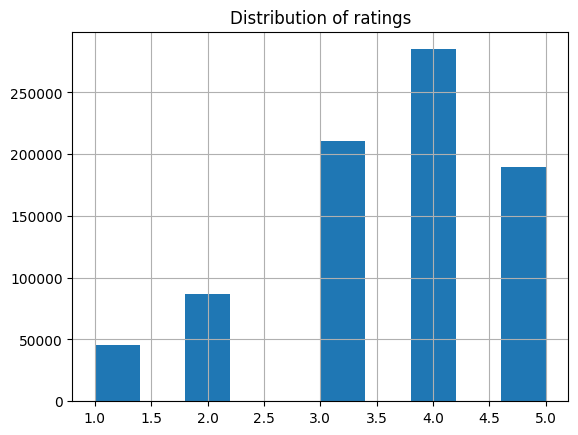

In [17]:
rating_df.rating.hist()
plt.title('Distribution of ratings')

Text(0.5, 1.0, 'Distribution of timestamp')

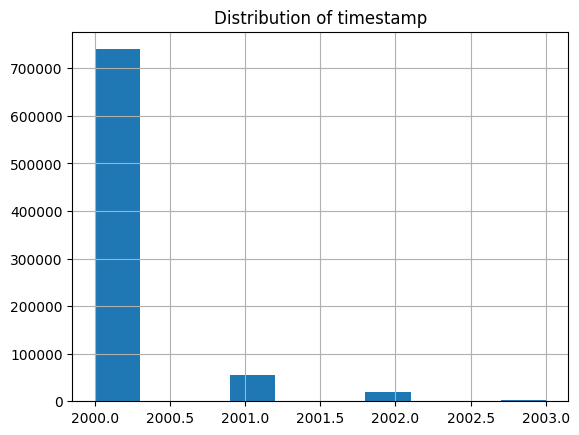

In [18]:
rating_df.timestamp.hist()
plt.title('Distribution of timestamp')

In [19]:
rating_df = rating_df.explode('genre')
rating_df

,userid,movieid,rating,timestamp,gender,age,occupation,zip,title,genre,year
0,1,1193,5,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,2000,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,2000,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,2000,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,2000,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
817419,5433,286,3,2000,F,35,17,45014,Nemesis 2: Nebula (1995),Thriller,1995
817420,5556,2198,3,2000,M,45,6,92103,Modulations (1998),Documentary,1998
817421,5949,2198,5,2000,M,18,17,47901,Modulations (1998),Documentary,1998
817422,5675,2703,3,2000,M,35,14,30030,Broken Vessels (1998),Drama,1998


In [20]:
rating_df.groupby('genre')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,216039.0,3.519915,1.135409,1.0,3.0,4.0,4.0,5.0
Adventure,114869.0,3.496522,1.137819,1.0,3.0,4.0,4.0,5.0
Animation,37918.0,3.692758,1.077411,1.0,3.0,4.0,5.0,5.0
Children's,63860.0,3.438459,1.160476,1.0,3.0,4.0,4.0,5.0
Comedy,290626.0,3.531528,1.123208,1.0,3.0,4.0,4.0,5.0
Crime,68811.0,3.725393,1.073312,1.0,3.0,4.0,5.0,5.0
Documentary,5951.0,3.944211,1.032699,1.0,3.0,4.0,5.0,5.0
Drama,287545.0,3.775322,1.046889,1.0,3.0,4.0,5.0,5.0
Fantasy,33383.0,3.435461,1.141122,1.0,3.0,4.0,4.0,5.0


Text(0.5, 1.0, 'Average rating based on genre')

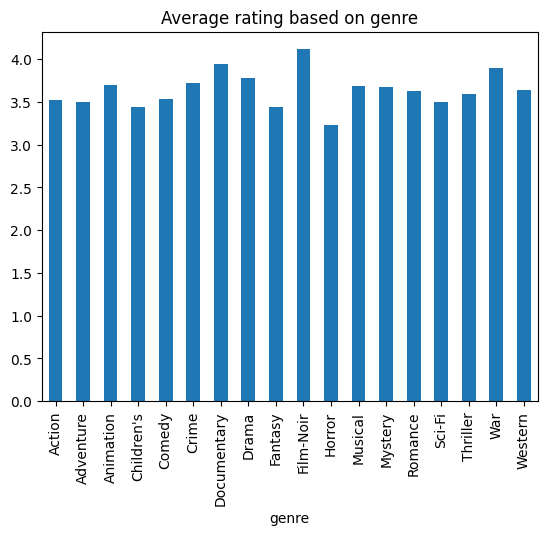

In [19]:
rating_df.groupby('genre')['rating'].mean().plot(kind='bar')
plt.title('Average rating based on genre')

In [20]:
# genre ratings grouped by movie production year 

genre_ratings = rating_df[['genre', 'rating', 'year']]
genre_ratings['year'] = genre_ratings['year'].astype('int')
genre_ratings['year_group'] = pd.cut(genre_ratings['year'], bins=range(1919, 2010, 10), right=False)
genre_ratings = genre_ratings.groupby(['genre', 'year_group'])['rating'].mean().unstack(0)
genre_ratings

C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_26356\518148728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_ratings['year'] = genre_ratings['year'].astype('int')
C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_26356\518148728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_ratings['year_group'] = pd.cut(genre_ratings['year'], bins=range(1919, 2010, 10), right=False)


genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year_group,,,,,,,,,,,,,,,,,,
"[1919, 1929)",3.790323,3.411765,NaN,NaN,4.177700,NaN,NaN,3.823322,NaN,NaN,NaN,NaN,NaN,NaN,4.082474,NaN,3.970085,NaN
"[1929, 1939)",3.176471,3.971074,3.845347,3.845347,4.192056,4.263323,2.000000,4.015697,NaN,4.301948,3.838118,3.873042,4.188492,4.079022,3.750000,4.143033,4.238472,3.379310
"[1939, 1949)",3.425743,4.129222,3.723583,3.921634,3.960669,4.203571,NaN,4.168409,NaN,4.275932,3.270341,3.968611,4.267248,4.176571,2.166667,4.059751,4.139936,3.330827
"[1949, 1959)",4.091275,3.918236,3.704009,3.703747,3.906737,4.184349,3.000000,4.126615,3.669236,4.227775,3.338421,3.820497,4.203053,4.057072,3.635814,4.095805,4.113277,4.011429
"[1959, 1969)",3.918404,3.873942,3.736441,3.654583,3.846995,4.108064,3.791946,4.075105,3.128125,4.201599,3.730435,3.818915,4.042886,4.100923,3.845560,4.046083,4.264019,3.939819
"[1969, 1979)",3.949690,3.832456,3.451040,3.410669,3.905434,4.231748,3.625000,4.031093,4.204135,4.339241,3.644042,3.467441,4.140695,3.828075,3.760649,3.888565,3.935803,3.912211
"[1979, 1989)",3.695822,3.661880,3.590398,3.539988,3.596753,3.750314,4.015385,3.834292,3.578713,4.012538,3.309403,3.671721,3.474406,3.658833,3.682993,3.725243,3.952441,3.375606
"[1989, 1999)",3.340490,3.246343,3.704909,3.264302,3.402659,3.628369,3.997543,3.667659,2.940641,3.924154,2.833234,3.501570,3.476537,3.555563,3.304081,3.519586,3.721502,3.503119
"[1999, 2009)",3.411975,3.151817,3.744339,3.508853,3.508569,3.318393,3.742077,3.652741,3.352857,NaN,3.007732,3.810107,3.296713,3.312763,3.334937,3.450688,3.598425,2.158537


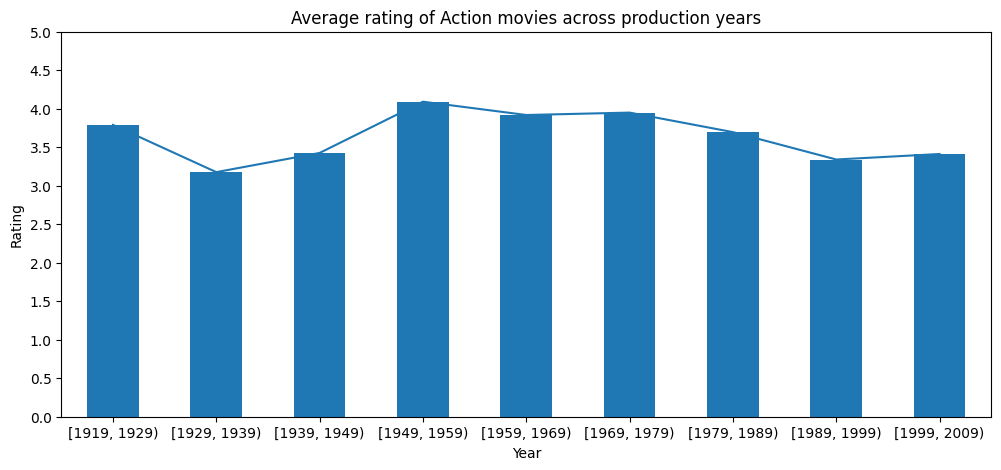

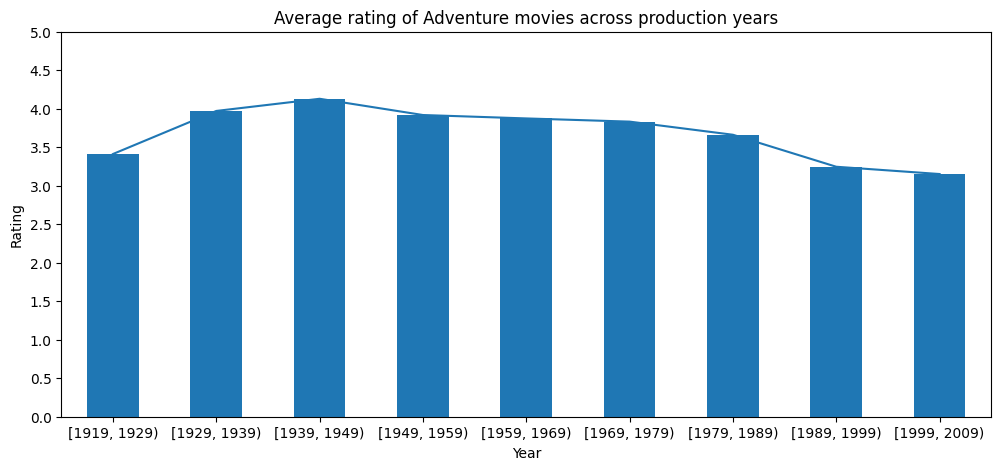

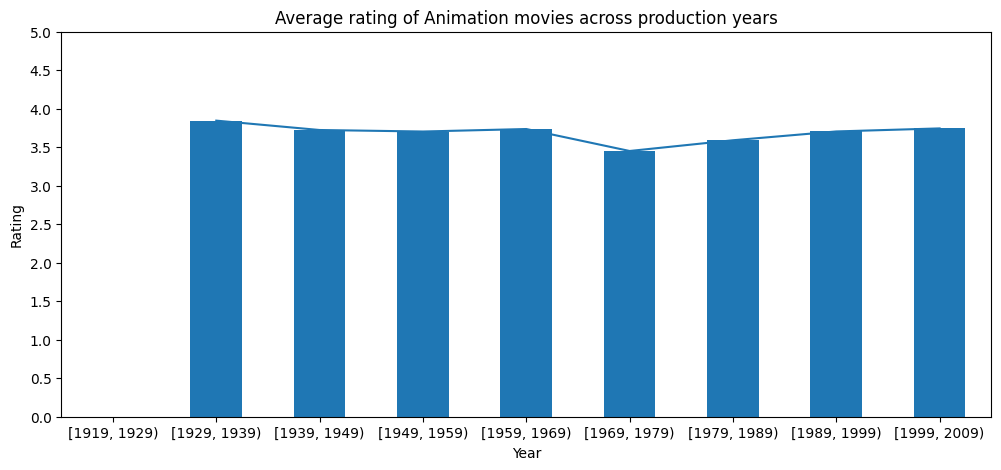

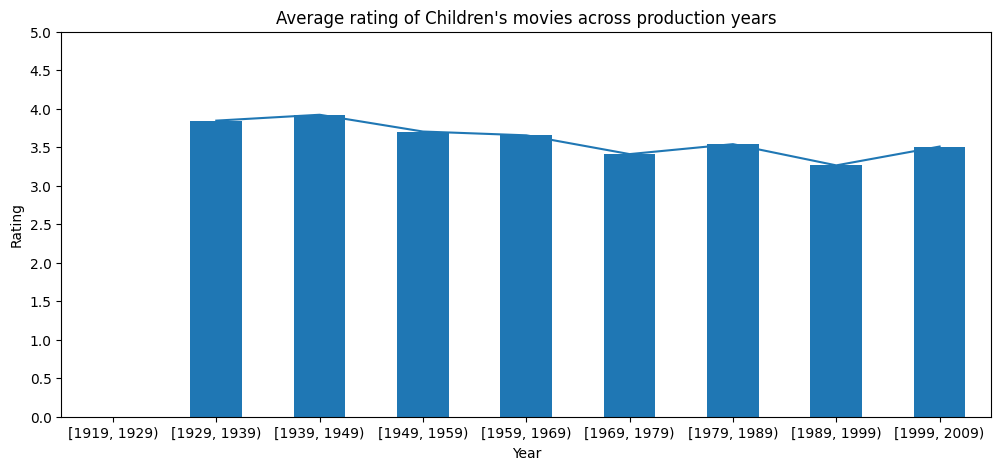

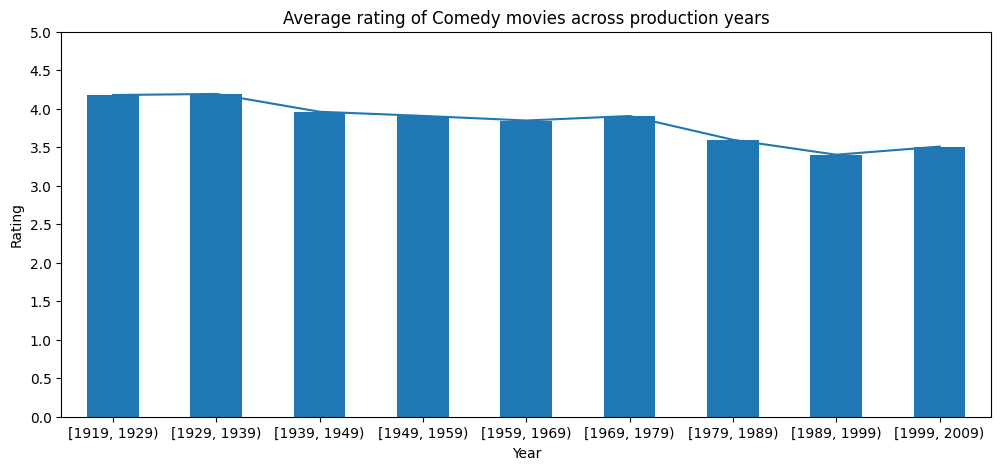

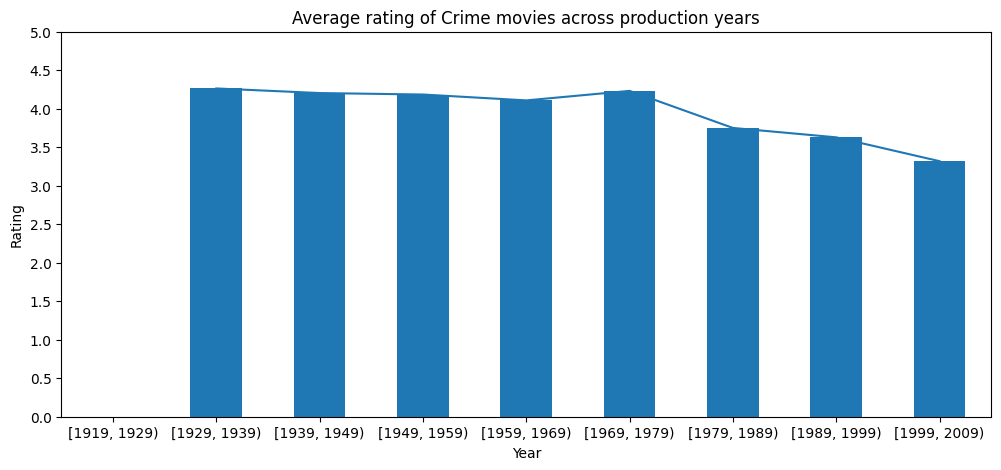

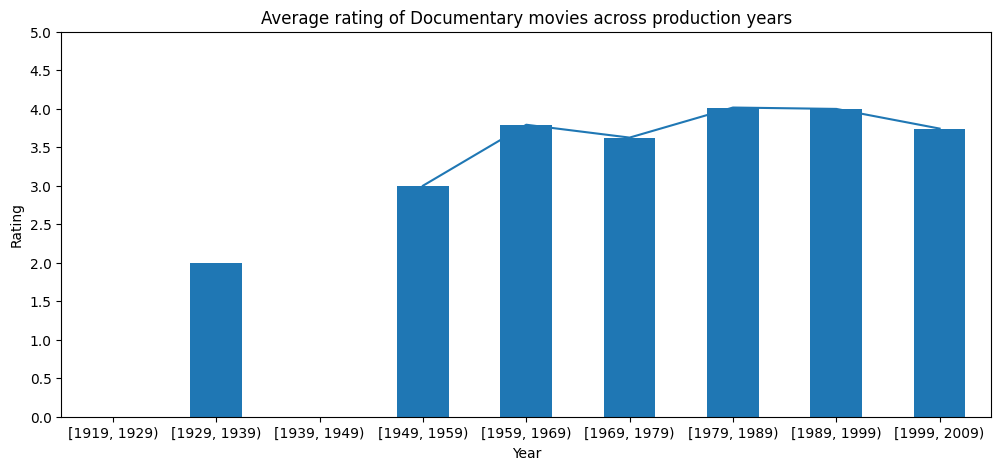

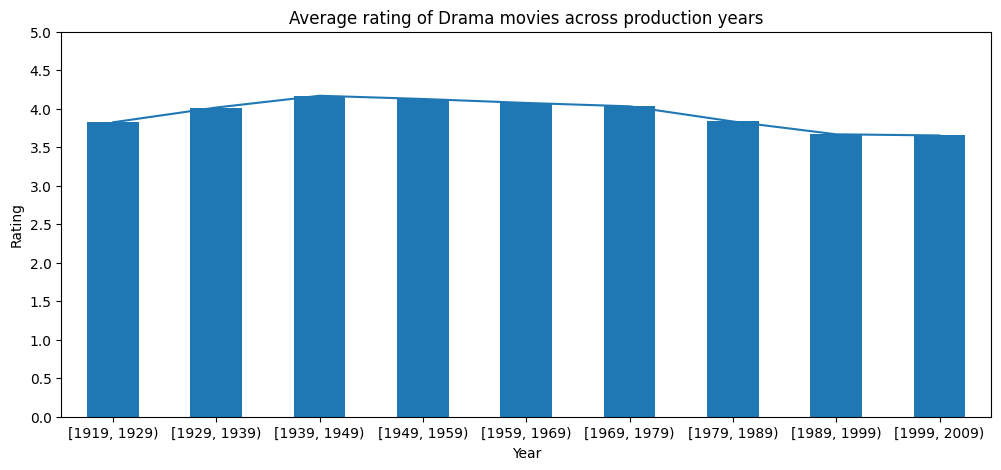

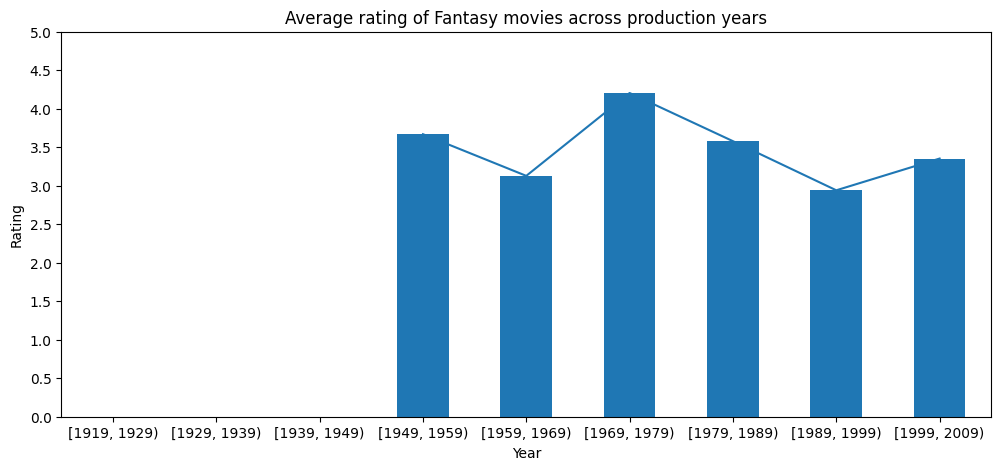

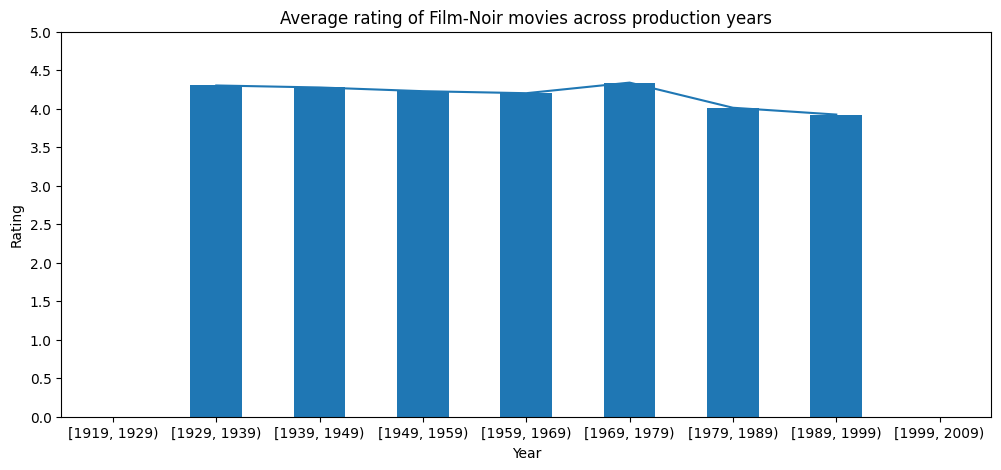

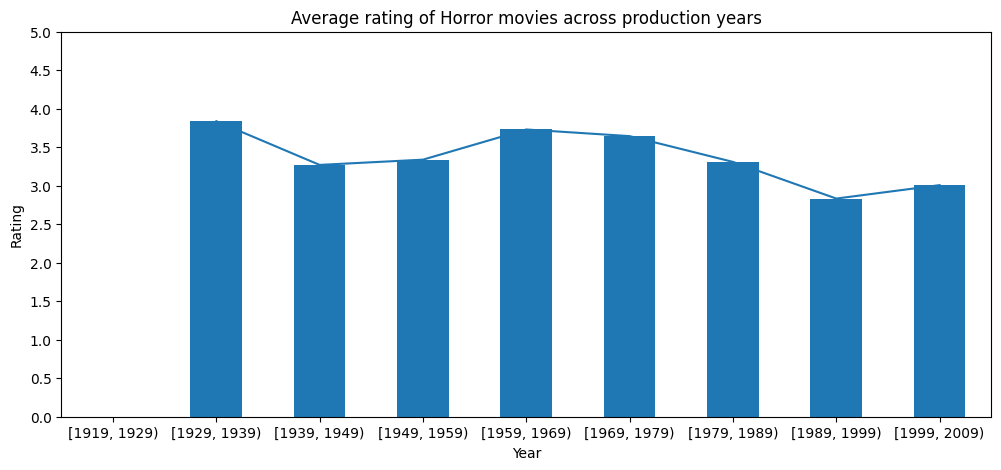

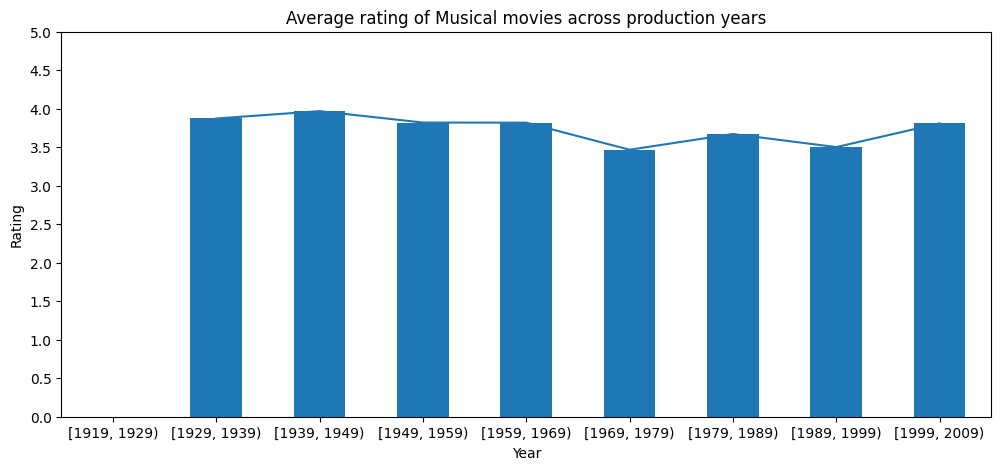

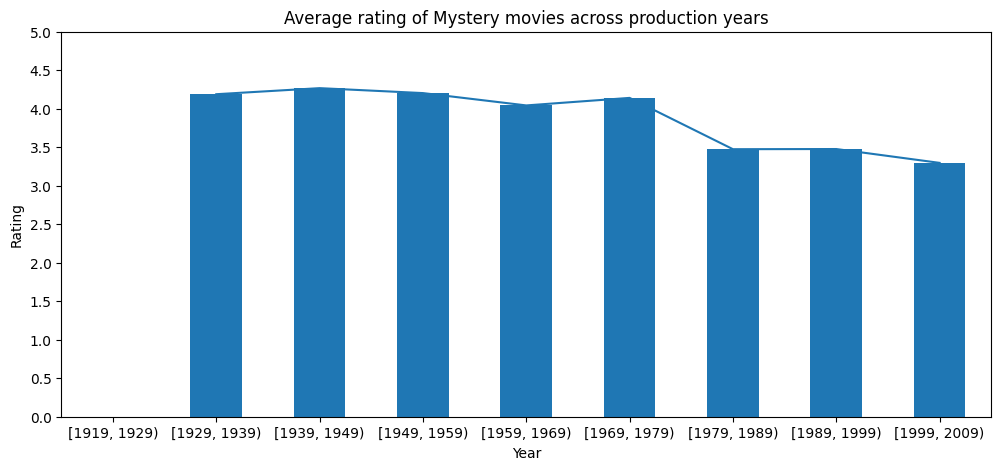

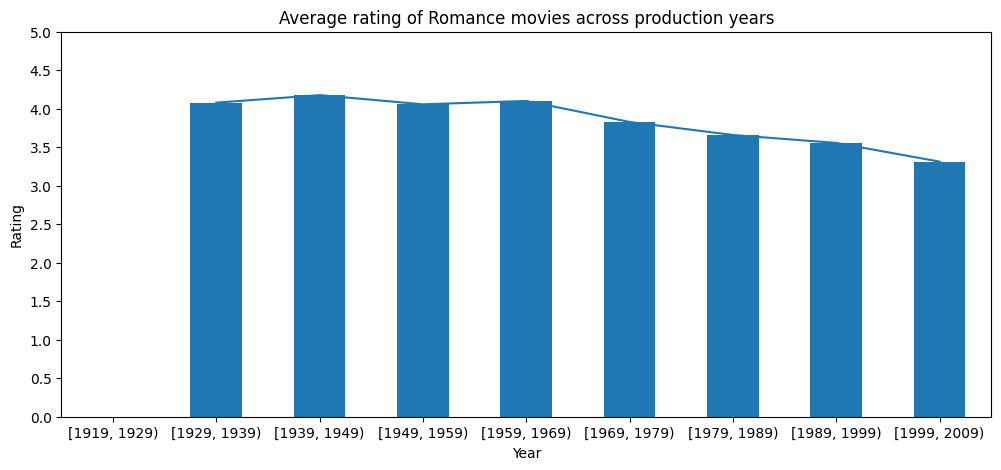

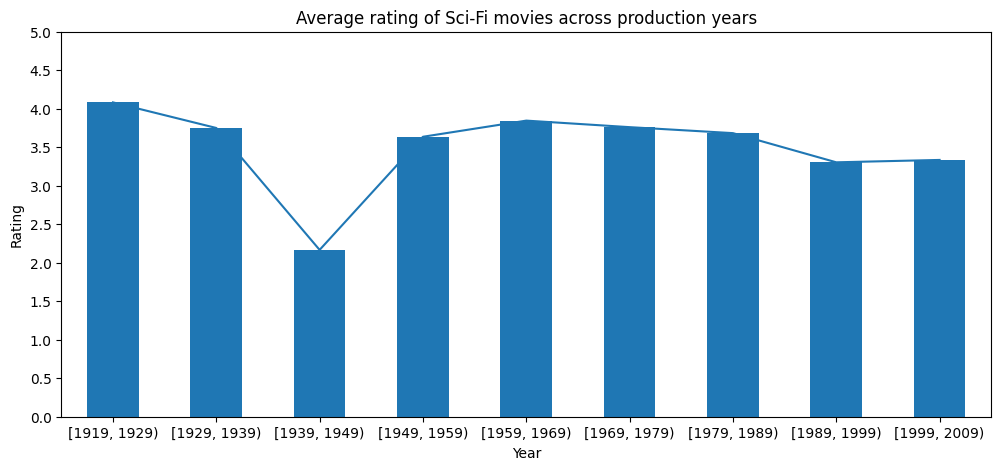

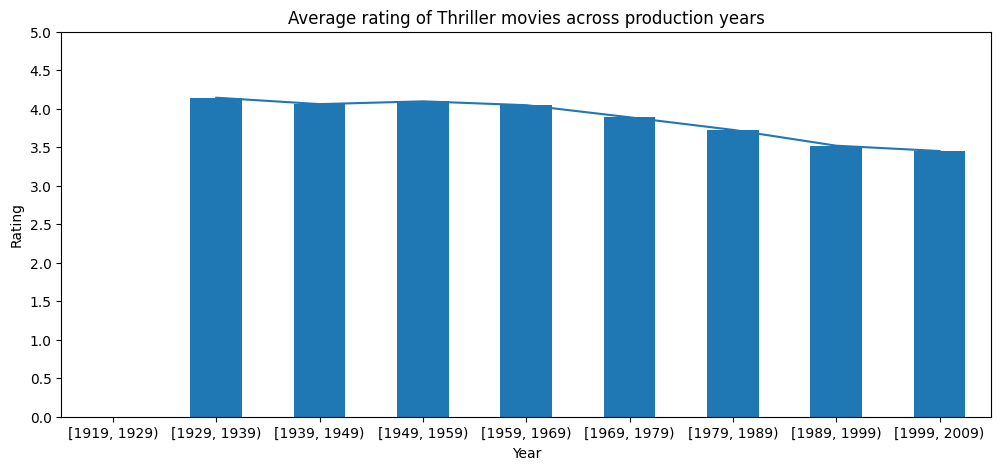

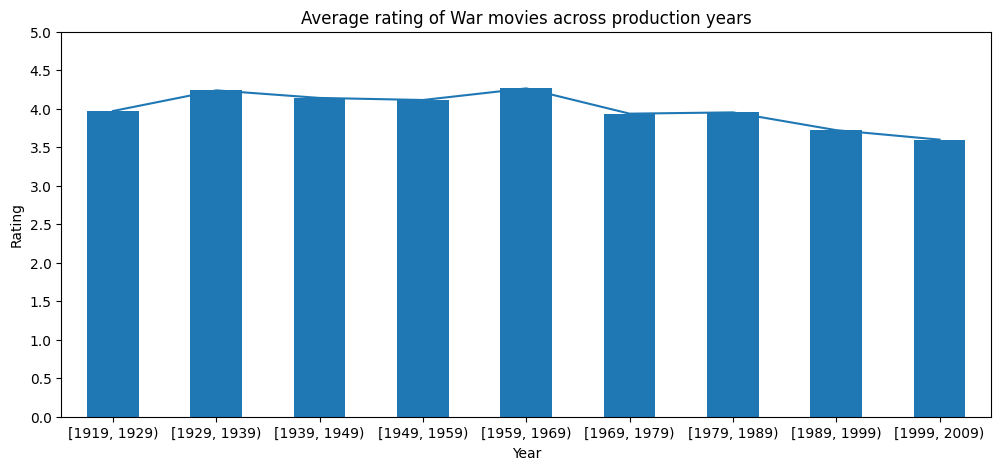

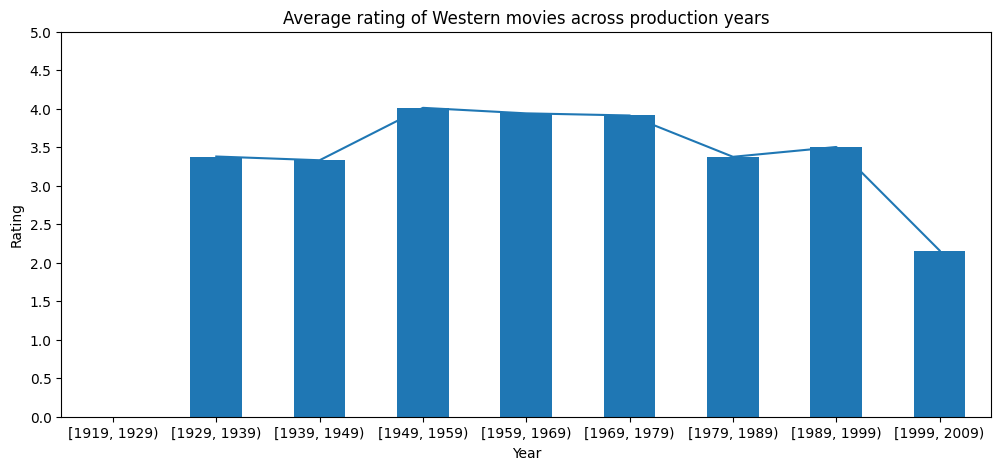

In [21]:
for genre in genre_ratings.columns:
    # convert index to string
    genre_ratings.index = genre_ratings.index.astype(str)
    # plot each genre avg rating across year using bar graph with line on top of it
    plt.figure(figsize=(12, 5))
    genre_ratings[genre].plot(kind='bar')
    genre_ratings[genre].plot(kind='line')
    plt.title(f'Average rating of {genre} movies across production years')
    plt.xlabel('Year')
    plt.ylabel('Rating')
    plt.yticks(np.arange(0, 5.5, 0.5))
    plt.show()

In [42]:
genre_ratings_years = rating_df[['genre', 'rating', 'year']]
genre_ratings_years['year'] = genre_ratings_years['year'].astype('int')
genre_ratings_years = genre_ratings_years.groupby(['genre', 'year'])['rating'].mean().unstack(0)
genre_ratings_years.to_csv('genre_ratings_years.csv')
genre_ratings_years

C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_26356\4022862963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_ratings_years['year'] = genre_ratings_years['year'].astype('int')


genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,
1919,NaN,2.666667,NaN,NaN,NaN,NaN,NaN,2.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,3.790323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,3.444444,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,NaN,NaN,NaN,NaN,4.124224,NaN,NaN,3.970085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.970085,NaN
1926,NaN,3.571429,NaN,NaN,3.400000,NaN,NaN,3.243243,NaN,NaN,NaN,NaN,NaN,NaN,4.082474,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,3.217271,3.223110,3.284231,2.935625,3.174690,3.776589,3.941288,3.698263,2.876640,3.058621,2.760000,3.269645,3.891101,3.423717,3.137241,3.395130,3.379856,2.906250
1997,3.171637,3.149437,3.586957,2.832215,3.370583,3.604585,3.862306,3.623019,2.718571,4.171815,3.084671,3.055938,3.610782,3.351139,3.422657,3.366555,3.160595,NaN
1998,3.469377,2.872932,3.535143,3.394721,3.527239,3.559004,3.668000,3.594373,2.805556,3.635123,2.514508,3.231555,3.302621,3.640038,3.201943,3.326849,3.918526,NaN


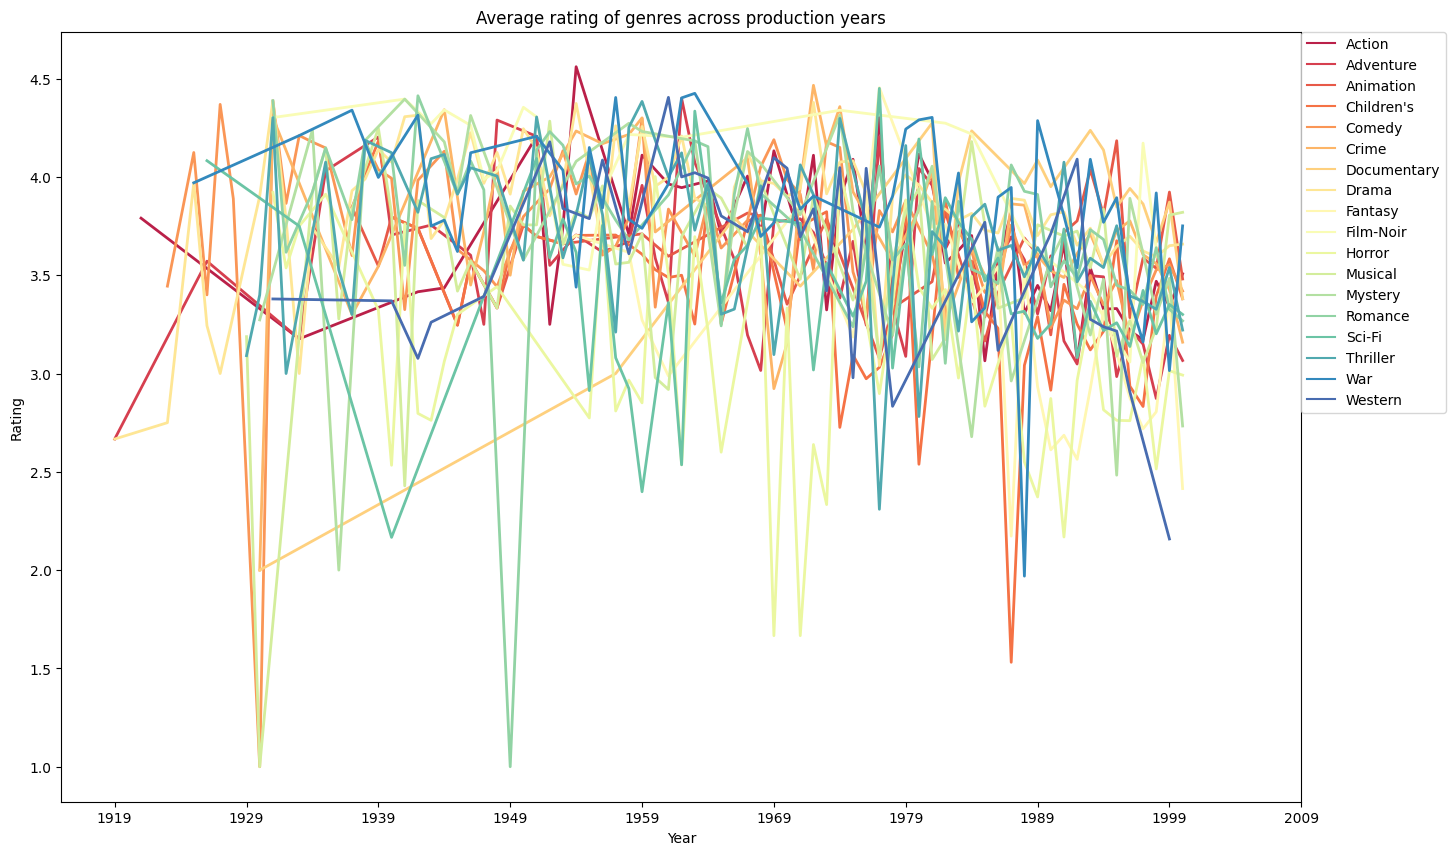

In [40]:
plt.figure(figsize=(16,10))

sns.lineplot(data=genre_ratings_years,palette="Spectral", legend="full", dashes=False, linewidth=2)
plt.title('Average rating of genres across production years')
plt.xticks(np.arange(1919, 2010, 10))
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()